In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
train=pd.read_csv("SalaryData_Train.csv")

In [3]:
test=pd.read_csv("SalaryData_Test.csv")

In [4]:
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


# EDA

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [7]:
train.shape

(30161, 14)

In [8]:
test.shape

(15060, 14)

In [9]:
x_train=train.iloc[:,:13]
y_train=train[["Salary"]]

In [10]:
x_test=test.iloc[:,:13]
y_test=test[["Salary"]]

### Dealing with Categorical columns

In [11]:
catagorical=[cat for cat in x_train.columns if x_train[cat].dtype=="object"]

In [12]:
x_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [13]:
catagorical

['workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native']

In [14]:
x_train=pd.get_dummies(x_train,columns=catagorical)

In [15]:
x_train.head()

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
y_train.head(3)

,Salary
0,<=50K
1,<=50K
2,<=50K


In [17]:
y_train=pd.get_dummies(y_train,columns=["Salary"],drop_first=True)
y_train.head(3)

,Salary_ >50K
0,0
1,0
2,0


In [18]:
y_train.value_counts()

Salary_ >50K
0               22653
1                7508
dtype: int64

In [19]:
y_train.rename(columns={"Salary_ >50K":"Salary"},inplace=True)

In [20]:
x_test=pd.get_dummies(x_test,columns=catagorical)

In [21]:
y_test=pd.get_dummies(y_test,columns=["Salary"],drop_first=True)
y_test.rename(columns={"Salary_ >50K":"Salary"},inplace=True)

# Model Building

In [22]:
from sklearn.naive_bayes import GaussianNB

In [23]:
model=GaussianNB()

In [24]:
model.fit(x_train,y_train)

GaussianNB()

In [25]:
y_train_pred=model.predict(x_train)

In [26]:
y_test_pred=model.predict(x_test)

# Evaluating

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
accuracy_score(y_train,y_train_pred) #### Accuracy on train data

0.8031563940187659

In [29]:
accuracy_score(y_test,y_test_pred)   #### Accuracy on test data

0.8029216467463479

#### Hence, model is not overfitted as test and train accuracies are almost same

# Check Null Accuracy

In [30]:
y_test.value_counts()

Salary
0         11360
1          3700
dtype: int64

In [31]:
null_accuracy = (7407/(7407+2362))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7582


#### We can see that our model accuracy score is `0.8083` but null accuracy score is `0.7582`. So, we can conclude that our Gaussian Naive Bayes Classification model is doing a very good job in predicting the class labels.

# Confusion matrix

In [32]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred)

<AxesSubplot:>

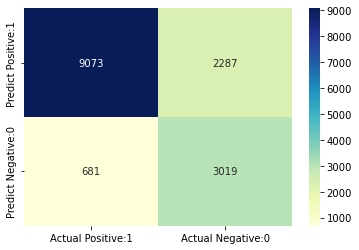

In [33]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# Classifiction report

In [34]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.93      0.80      0.86     11360
           1       0.57      0.82      0.67      3700

    accuracy                           0.80     15060
   macro avg       0.75      0.81      0.76     15060
weighted avg       0.84      0.80      0.81     15060

